In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Company,Job Description,Matches,Salary Estimate,Rating,Location,Size,Founded,Type of ownership,...,sprout_yn,sf_yn,excel_yn,adobe_yn,g_ads_yn,power_bi_yn,powerpoint_yn,meta_yn,tableau_yn,sql_yn
0,Market Analyst,"Tuff Boy Sales, Inc.",PURPOSE AND KEY RESULTS OF THE POSITION\nUnder...,1,$75K – $85K/yr (Employer est.),-1.0,"Lathrop, CA",-1,-1,-1,...,0,0,1,1,0,0,1,0,0,1
1,Senior Marketing Analyst/CRM Analyst,Paul Fredrick,Senior Marketing Analyst/CRM Analyst\nReports ...,1,$90K – $95K/yr (Employer est.),-1.0,"Sparks Glencoe, MD",-1,-1,-1,...,0,0,1,0,0,0,0,0,0,1
2,Marketing Analyst,Red Dog Media,Internal Title:\nMarketing Specialist\n*\nJob ...,1,$55K – $80K/yr (Employer est.),4.5,"Henderson, NV",1 to 50 Employees,2008,Company - Private,...,0,0,1,0,1,1,0,0,1,1
3,Digital Marketing Analyst,Confidential,Overview:\nWe are seeking a skilled and motiva...,1,$45K – $60K/yr (Employer est.),-1.0,North Chesterfield,-1,-1,-1,...,0,0,0,0,1,0,0,1,0,0
4,Marketing Data Analyst,Pink Zebra Home,Job Summary\nAs Pink Zebra Home’s Advertising ...,1,$64K – $70K/yr (Employer est.),-1.0,"Sugar Land, TX",-1,-1,-1,...,0,0,1,0,0,0,0,1,0,0


In [4]:
df.columns

Index(['Job Title', 'Company', 'Job Description', 'Matches', 'Salary Estimate',
       'Rating', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'salary_min', 'salary_max',
       'salary_avg', 'Employer Provided', 'job_state', 'job_city',
       'company_age', 'planning_yn', 'customer_segmentation_yn', 'A/B_yn',
       'kpi_metrics_yn', 'customer_behavior_yn', 'forecasting_yn', 'python_yn',
       'ga4_yn', 'html_yn', 'sprout_yn', 'sf_yn', 'excel_yn', 'adobe_yn',
       'g_ads_yn', 'power_bi_yn', 'powerpoint_yn', 'meta_yn', 'tableau_yn',
       'sql_yn'],
      dtype='object')

In [5]:
df['Job Title'].unique()

array(['Market Analyst', 'Senior Marketing Analyst/CRM Analyst',
       'Marketing Analyst', 'Digital Marketing Analyst',
       'Marketing Data Analyst', 'Marketing Analyst IV',
       'Digital Marketing Specialist - Account Manager',
       'Sales and Marketing Analyst (GP)',
       'E-Commerce Marketing Associate (Analytical) (Hybrid Remote)',
       'Senior Digital Marketing Analyst (Hybrid)',
       'Sr. Performance Marketing Analyst (I, II)',
       'Secondary Marketing Analyst I - Pricing',
       'Senior Marketing Analyst', 'Jr. Internet Marketing Specialist',
       'Senior Email Marketing Analyst', 'Jr. Business Data Analyst',
       'Digital Marketing Specialist - Account Manager- Ft Myers, FL',
       'Jr. Digital Marketing Specialist - Strategy Track',
       'Jr. Digital Communications Account Manager',
       'Junior Marketing Analyst', 'Analyst, Growth Marketing',
       'Strategic Marketing Analyst',
       'Marketing Analyst, Performance Reporting & Analysis',
       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job Title                 100 non-null    object 
 1   Company                   100 non-null    object 
 2   Job Description           100 non-null    object 
 3   Matches                   100 non-null    int64  
 4   Salary Estimate           100 non-null    object 
 5   Rating                    100 non-null    float64
 6   Location                  100 non-null    object 
 7   Size                      100 non-null    object 
 8   Founded                   100 non-null    object 
 9   Type of ownership         100 non-null    object 
 10  Industry                  100 non-null    object 
 11  Sector                    100 non-null    object 
 12  Revenue                   100 non-null    object 
 13  salary_min                100 non-null    float64
 14  salary_max 

In [7]:
def title_simplifier(title):
    if 'campaign' in title.lower():
        return 'campaign'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    elif 'digital' in title.lower():
        return 'digital'
    elif 'content' in title.lower():
        return 'content'
    elif 'social' in title.lower():
        return 'socials'
    elif 'sales' in title.lower():
        return 'sales'
    elif 'crm' in title.lower():
        return 'crm'
    elif 'product' in title.lower():
        return 'product'
    elif 'perforance' in title.lower():
        return 'performance'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [8]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [9]:
df.job_simplified.value_counts()

job_simplified
na          68
digital     21
product      3
crm          2
sales        2
campaign     2
content      2
Name: count, dtype: int64

In [10]:
df['seniority'] = df['Job Title'].apply(seniority)

In [11]:
df.seniority.value_counts()

seniority
na        81
senior    13
jr         6
Name: count, dtype: int64

In [12]:
df.job_state.value_counts()

job_state
CA                    20
United States         10
PA                     8
TX                     7
Remote                 7
NY                     7
IL                     5
NJ                     3
MI                     3
MA                     3
FL                     3
MD                     3
VA                     3
WI                     2
UT                     2
OH                     2
NC                     2
MN                     1
North Chesterfield     1
MO                     1
AL                     1
NV                     1
GA                     1
WA                     1
ID                     1
KY                     1
AR                     1
Name: count, dtype: int64

In [13]:
df['job_state'] = df.job_state.apply(lambda x: x if x.lower() != 'north chesterfield' else 'VA')
df.job_state.value_counts()

job_state
CA               20
United States    10
PA                8
NY                7
TX                7
Remote            7
IL                5
VA                4
MI                3
MA                3
FL                3
MD                3
NJ                3
WI                2
UT                2
OH                2
NC                2
MN                1
MO                1
AL                1
NV                1
GA                1
WA                1
ID                1
KY                1
AR                1
Name: count, dtype: int64

In [14]:
#Job description length by char
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     4728
1     4692
2     6203
3     2170
4     7463
      ... 
95    4138
96    1192
97    4187
98    5031
99    4503
Name: desc_len, Length: 100, dtype: int64

In [15]:
#Competitor count by industry and sector
# Create an empty list to store counts
counts = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Get the sector and industry values of the current row
    sector = row['Sector']
    industry = row['Industry']
    
    # If either sector or industry is -1, set count to -1
    if sector == '-1' or industry == '-1':
        count = -1
    else:
        # Count the number of rows with similar sector and industry values
        count = len(df[(df['Sector'] == sector) & (df['Industry'] == industry)])
    
    # Append the count to the list
    counts.append(count)

# Add the counts list as a new column to the DataFrame
df['num_comp'] = counts

In [16]:
df.num_comp.head(15)

0     -1
1     -1
2     12
3     -1
4     -1
5     -1
6     12
7      5
8      3
9      2
10    -1
11     3
12     3
13    -1
14    12
Name: num_comp, dtype: int64

In [17]:
df.job_city.unique()

array(['Lathrop', 'Sparks Glencoe', 'Henderson', 'North Chesterfield',
       'Sugar Land', 'Houston', 'Harrisburg', 'Grand Prairie', 'Cerritos',
       'Oak Brook', 'Los Angeles', 'Pontiac', 'Remote', 'Boston',
       'San Francisco', 'Kingwood', 'United States', 'Raleigh',
       'Lancaster', 'Menlo Park', 'Boynton Beach', 'Santa Monica',
       'Rogers', 'Springfield', 'Basking Ridge', 'Philadelphia',
       'West Chester', 'Germantown', 'Mankato', 'Santa Clara',
       'Hauppauge', 'Chicago', 'West Hollywood', 'New York',
       'Salt Lake City', 'Detroit', 'Mountain View', 'Saint Charles',
       'Grand Rapids', 'West Trenton', 'Ballwin', 'Brooklyn',
       'Sacramento', 'Silver Spring', 'Irvine', 'Montgomery', 'Sussex',
       'Garden City', 'Oakland', 'Smyrna', 'Carlsbad', 'Bellevue',
       'Eagle', 'Glen Allen', 'West Sacramento', 'Jersey City',
       'Walnut Creek', 'Fort Worth', 'Tampa', 'Fort Lauderdale',
       'Fontana', 'Louisville', 'Pleasant Prairie', 'Amherst', 'Prov

In [18]:
df.drop('Matches', inplace=True, axis=1)

In [19]:
df.columns

Index(['Job Title', 'Company', 'Job Description', 'Salary Estimate', 'Rating',
       'Location', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'salary_min', 'salary_max', 'salary_avg',
       'Employer Provided', 'job_state', 'job_city', 'company_age',
       'planning_yn', 'customer_segmentation_yn', 'A/B_yn', 'kpi_metrics_yn',
       'customer_behavior_yn', 'forecasting_yn', 'python_yn', 'ga4_yn',
       'html_yn', 'sprout_yn', 'sf_yn', 'excel_yn', 'adobe_yn', 'g_ads_yn',
       'power_bi_yn', 'powerpoint_yn', 'meta_yn', 'tableau_yn', 'sql_yn',
       'job_simplified', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [20]:
#EDA

In [21]:
df.describe()

,Rating,salary_min,salary_max,salary_avg,Employer Provided,company_age,planning_yn,customer_segmentation_yn,A/B_yn,kpi_metrics_yn,...,excel_yn,adobe_yn,g_ads_yn,power_bi_yn,powerpoint_yn,meta_yn,tableau_yn,sql_yn,desc_len,num_comp
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.915000,57975.97600,77912.280000,67944.128000,0.880000,27.070000,0.310000,0.050000,0.110000,0.540000,...,0.690000,0.110000,0.190000,0.130000,0.440000,0.260000,0.220000,0.250000,4403.090000,3.860000
std,1.966147,28845.79033,37984.987589,32849.583972,0.326599,37.538736,0.464823,0.219043,0.314466,0.500908,...,0.464823,0.314466,0.394277,0.337998,0.498888,0.440844,0.416333,0.435194,2146.920407,3.856046
min,-1.000000,-1.00000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,927.000000,-1.000000
25%,3.000000,47000.00000,64350.000000,55090.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2823.750000,1.000000
50%,3.800000,58000.00000,81500.000000,69000.000000,1.000000,14.500000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4162.500000,2.000000
75%,4.200000,75000.00000,96000.000000,82560.000000,1.000000,38.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.250000,5608.500000,6.000000
max,5.000000,135200.00000,168000.000000,145600.000000,1.000000,174.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9470.000000,12.000000


<Axes: >

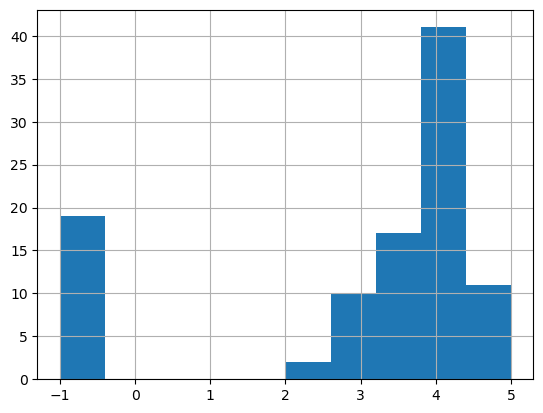

In [22]:
df.Rating.hist()

<Axes: >

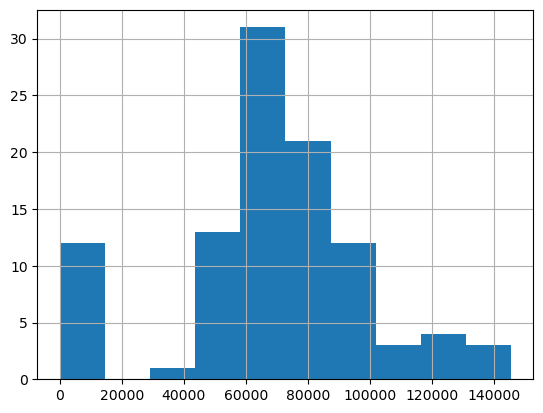

In [23]:
df.salary_avg.hist()

<Axes: >

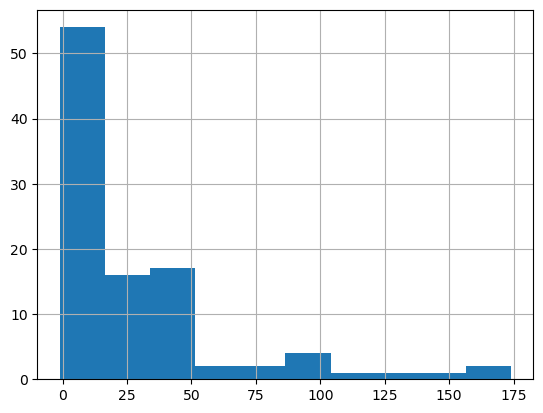

In [24]:
df.company_age.hist()

<Axes: >

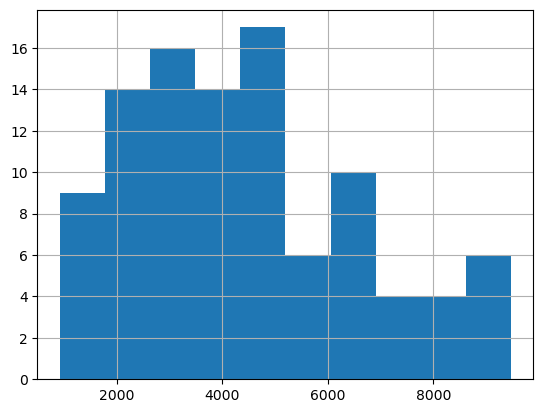

In [25]:
df.desc_len.hist()

<Axes: >

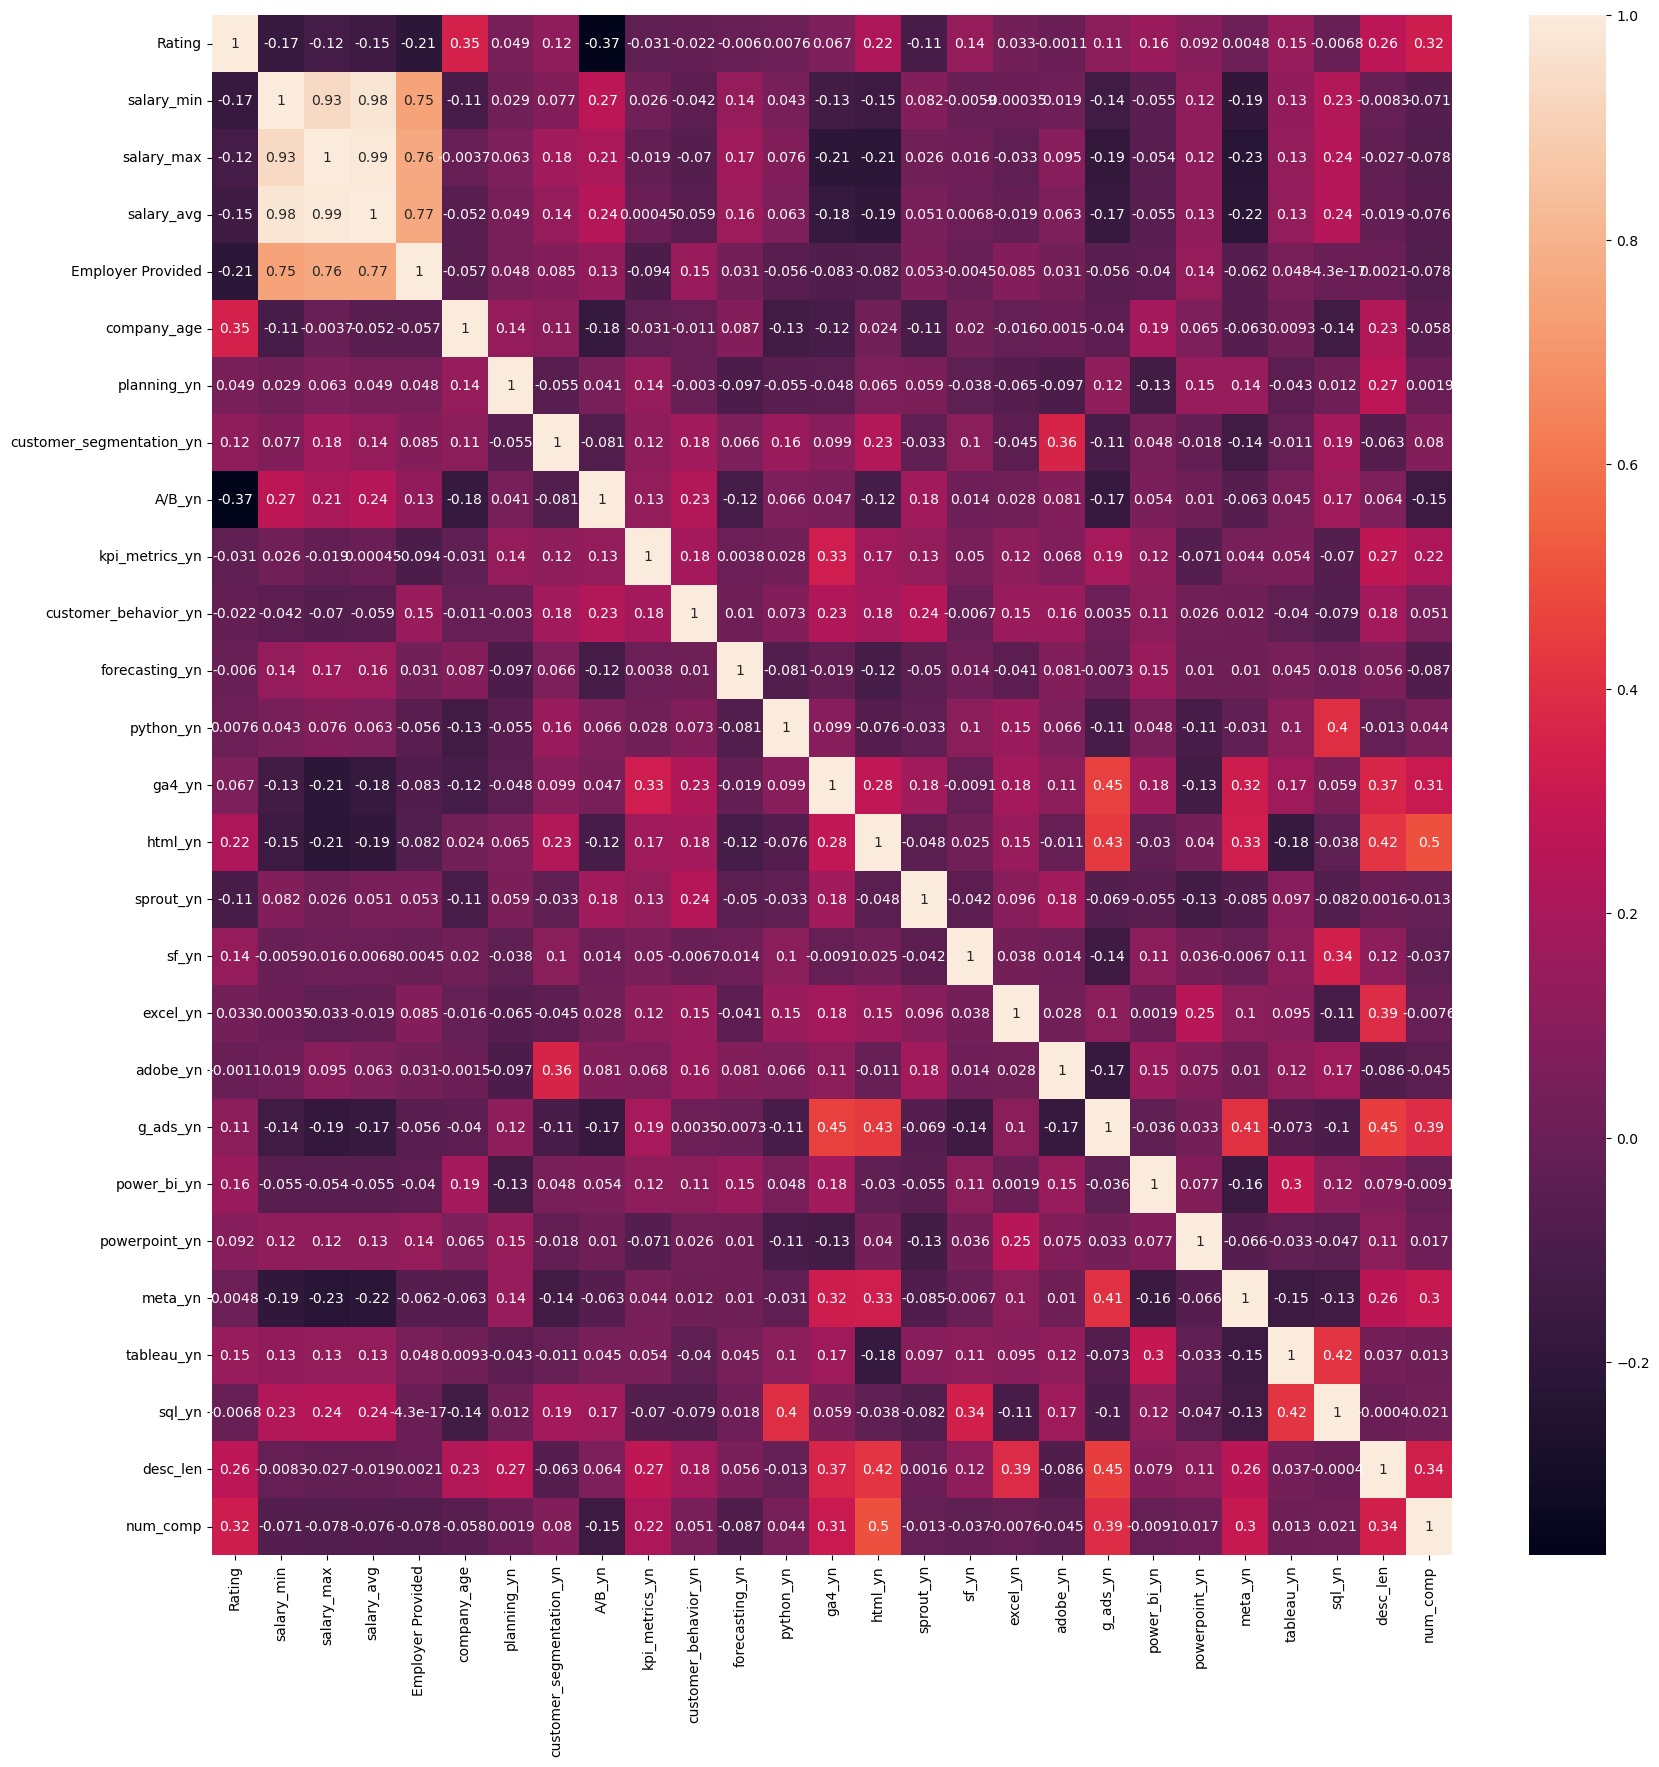

In [26]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, ax=ax)

<Axes: >

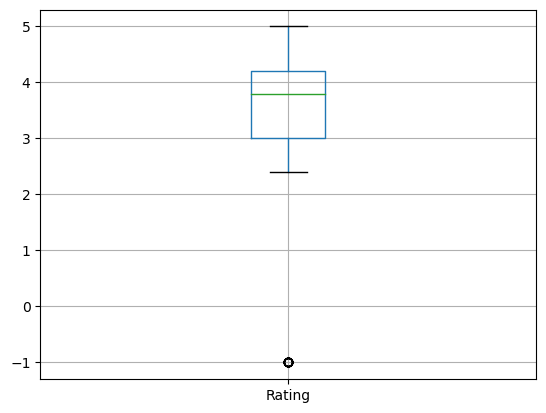

In [27]:
df.boxplot(column='Rating')

In [28]:
#Numerical EDA

In [29]:
df[['company_age', 'salary_avg', 'Rating', 'desc_len']].corr()

,company_age,salary_avg,Rating,desc_len
company_age,1.000000,-0.051886,0.346482,0.228566
salary_avg,-0.051886,1.000000,-0.146596,-0.019296
Rating,0.346482,-0.146596,1.000000,0.264691
desc_len,0.228566,-0.019296,0.264691,1.000000


<Axes: >

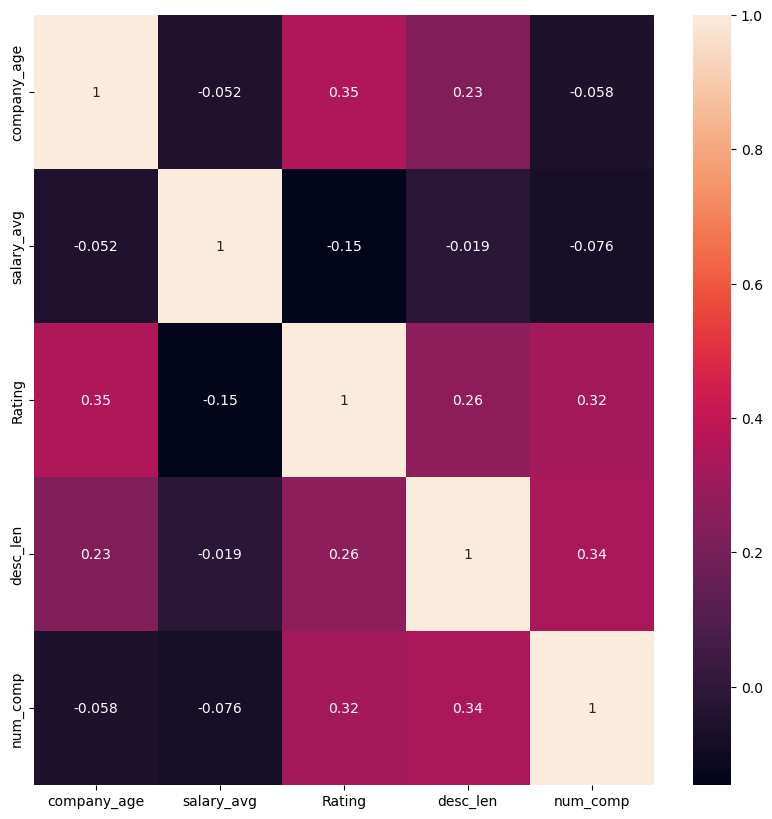

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['company_age', 'salary_avg', 'Rating', 'desc_len', 'num_comp']].corr(), annot=True, ax=ax)

In [31]:
df.columns

Index(['Job Title', 'Company', 'Job Description', 'Salary Estimate', 'Rating',
       'Location', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'salary_min', 'salary_max', 'salary_avg',
       'Employer Provided', 'job_state', 'job_city', 'company_age',
       'planning_yn', 'customer_segmentation_yn', 'A/B_yn', 'kpi_metrics_yn',
       'customer_behavior_yn', 'forecasting_yn', 'python_yn', 'ga4_yn',
       'html_yn', 'sprout_yn', 'sf_yn', 'excel_yn', 'adobe_yn', 'g_ads_yn',
       'power_bi_yn', 'powerpoint_yn', 'meta_yn', 'tableau_yn', 'sql_yn',
       'job_simplified', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [32]:
#Categorical EDA

In [33]:
df_cat = df[['Company', 'Location', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'job_state', 'job_city', 'planning_yn', 'customer_segmentation_yn', 'A/B_yn', 'kpi_metrics_yn',
       'customer_behavior_yn', 'forecasting_yn', 'python_yn', 'ga4_yn',
       'html_yn', 'sprout_yn', 'sf_yn', 'excel_yn', 'adobe_yn', 'g_ads_yn',
       'power_bi_yn', 'powerpoint_yn', 'meta_yn', 'tableau_yn', 'sql_yn',
       'job_simplified', 'seniority']]

Graph for Company: total = 90


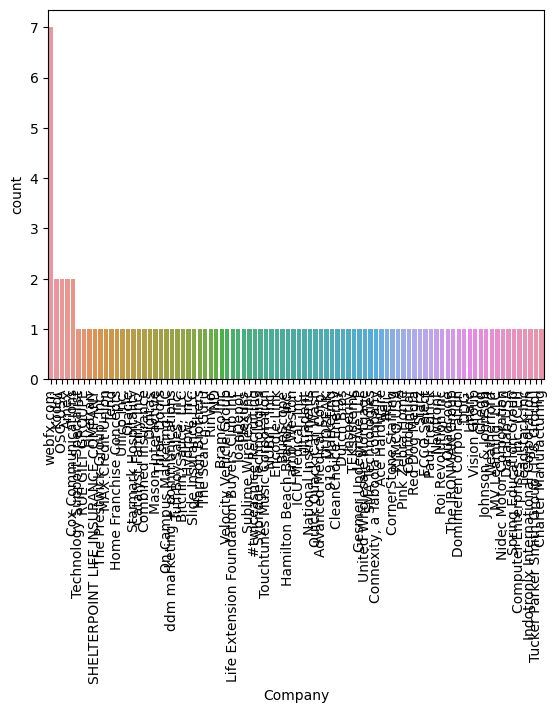

Graph for Location: total = 66


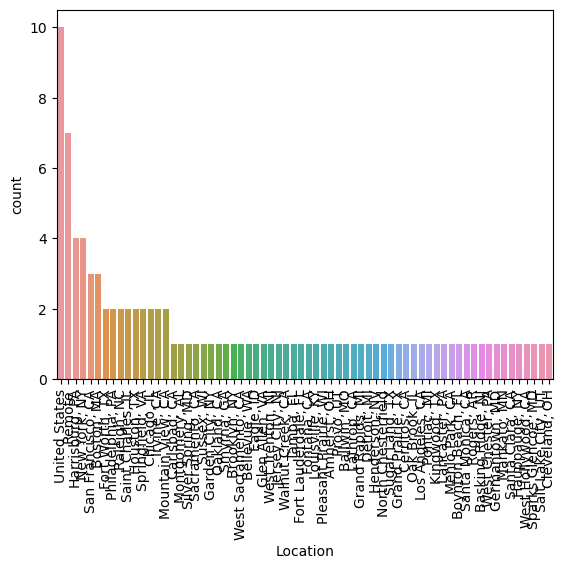

Graph for Size: total = 9


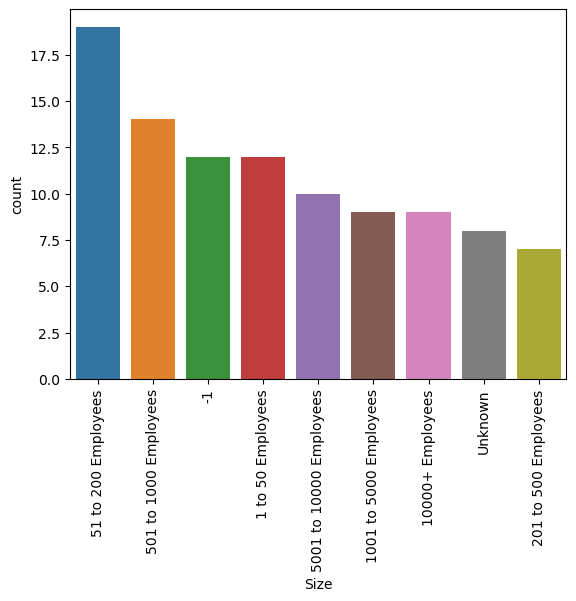

Graph for Type of ownership: total = 7


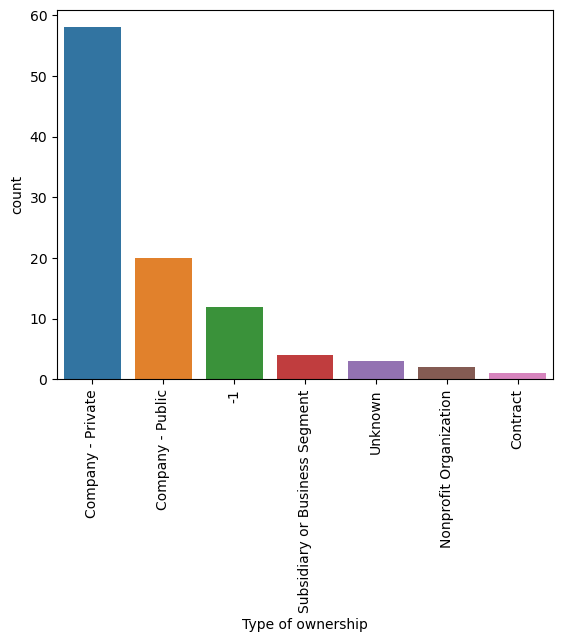

Graph for Industry: total = 37


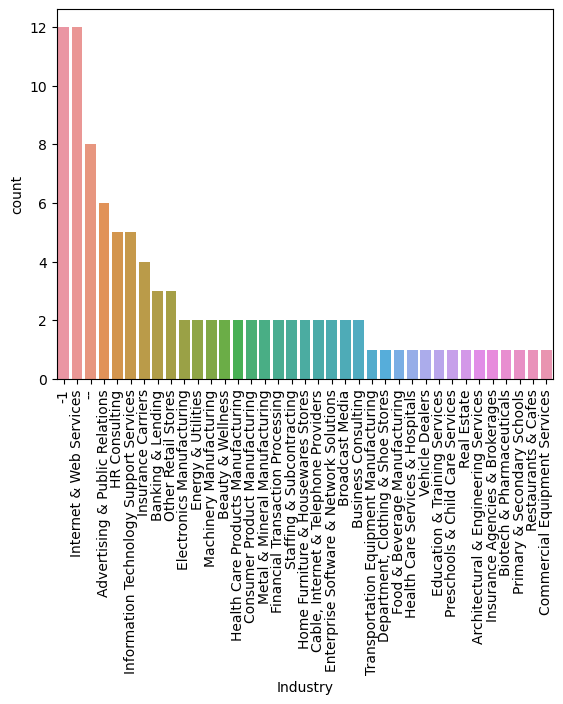

Graph for Sector: total = 19


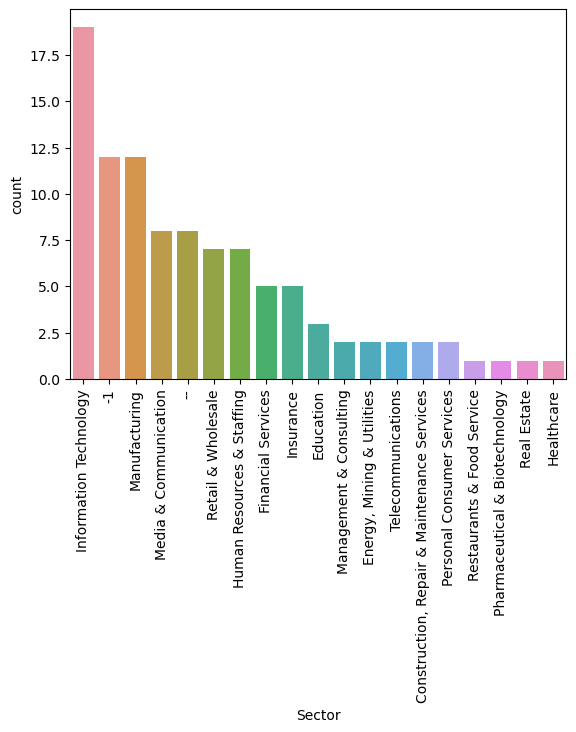

Graph for Revenue: total = 11


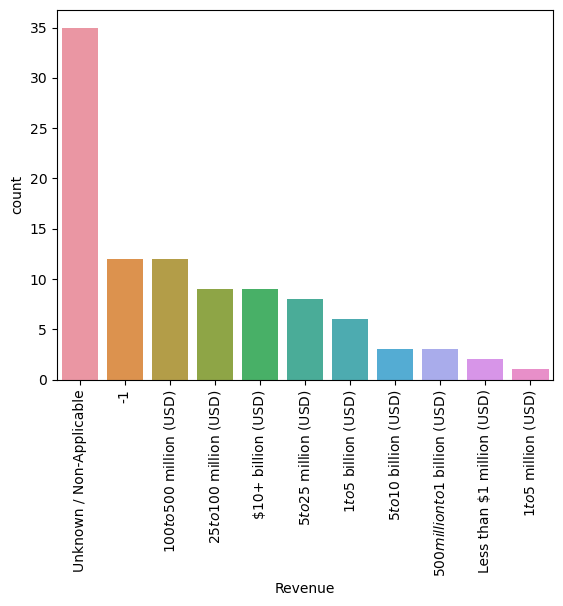

Graph for job_state: total = 26


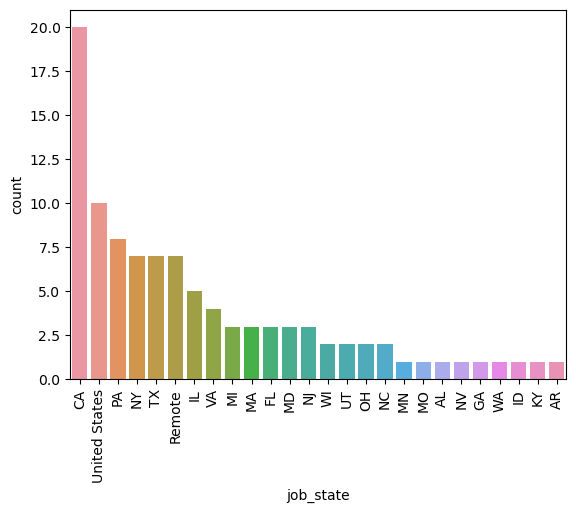

Graph for job_city: total = 66


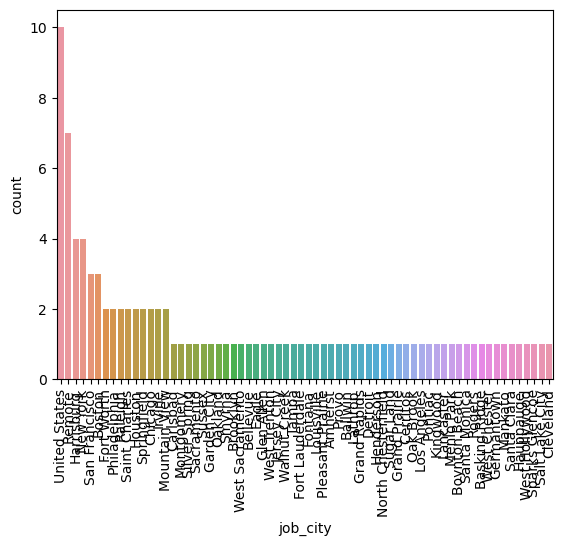

Graph for planning_yn: total = 2


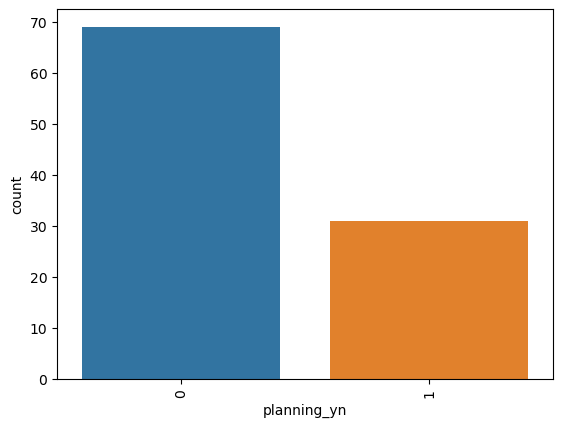

Graph for customer_segmentation_yn: total = 2


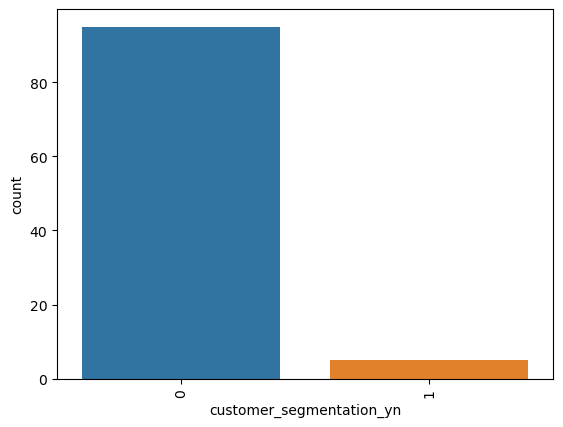

Graph for A/B_yn: total = 2


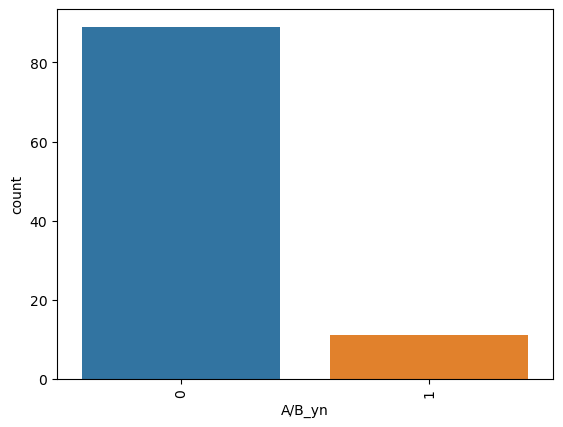

Graph for kpi_metrics_yn: total = 2


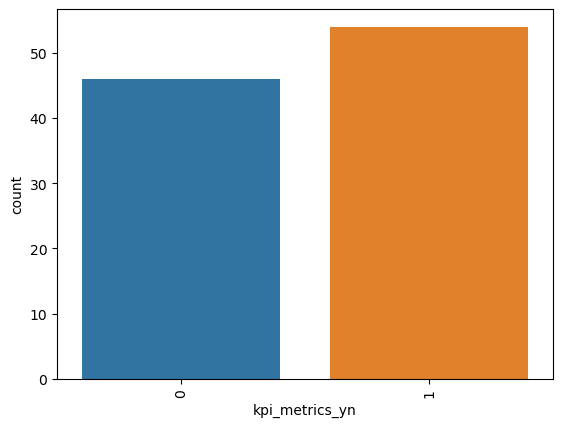

Graph for customer_behavior_yn: total = 2


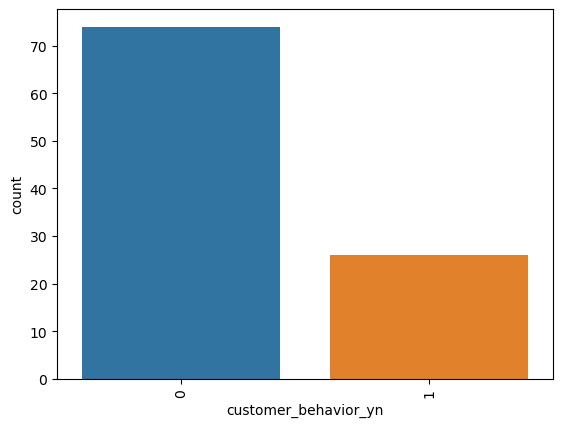

Graph for forecasting_yn: total = 2


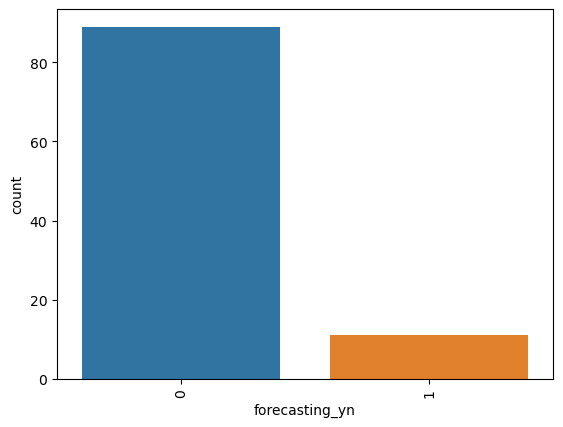

Graph for python_yn: total = 2


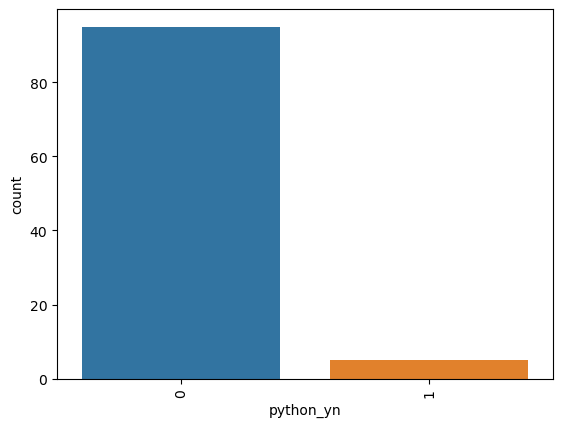

Graph for ga4_yn: total = 2


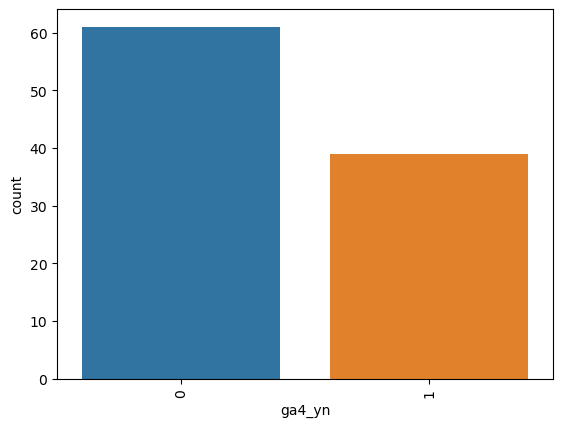

Graph for html_yn: total = 2


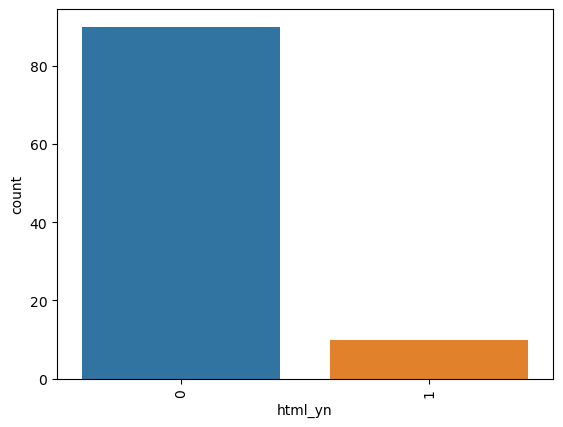

Graph for sprout_yn: total = 2


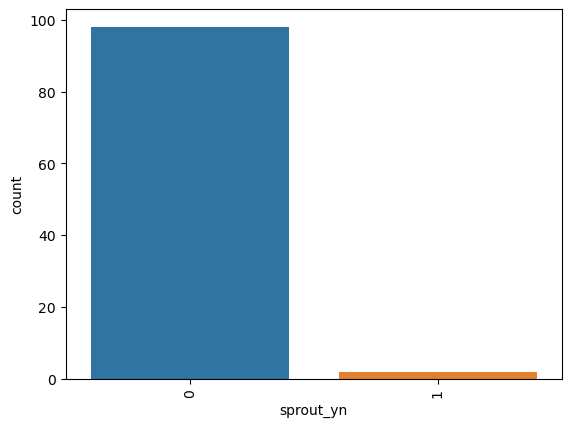

Graph for sf_yn: total = 2


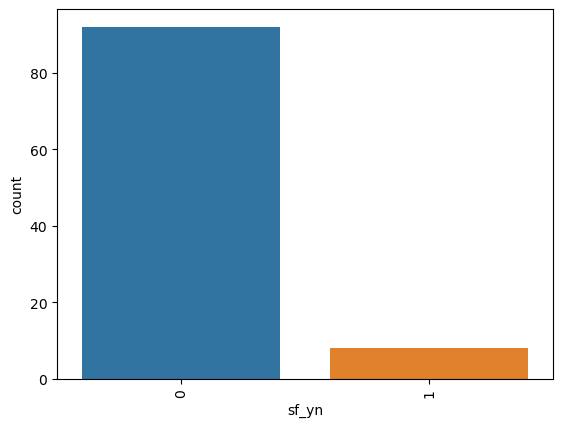

Graph for excel_yn: total = 2


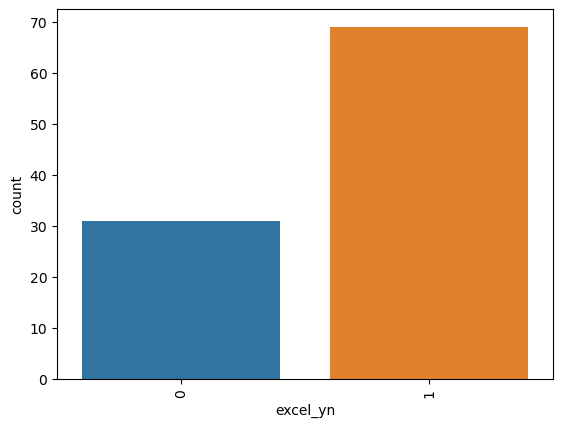

Graph for adobe_yn: total = 2


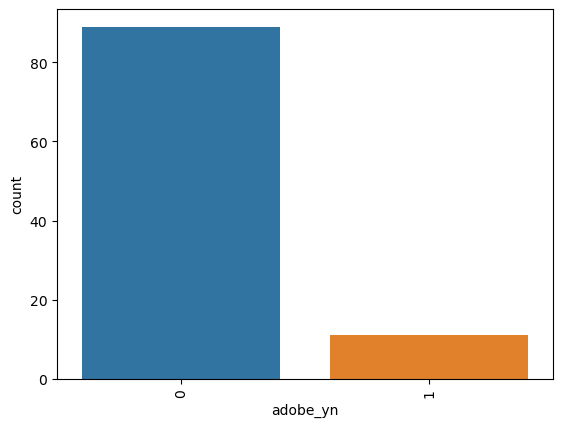

Graph for g_ads_yn: total = 2


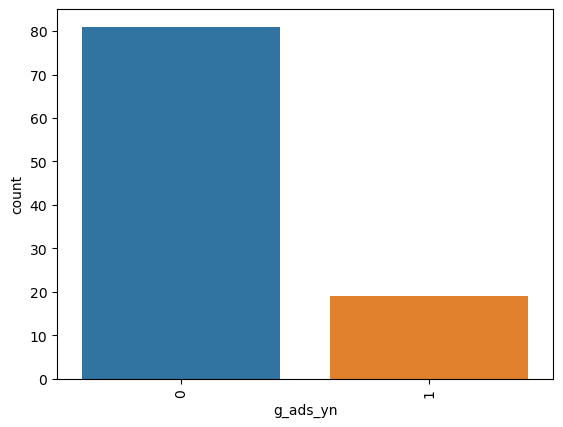

Graph for power_bi_yn: total = 2


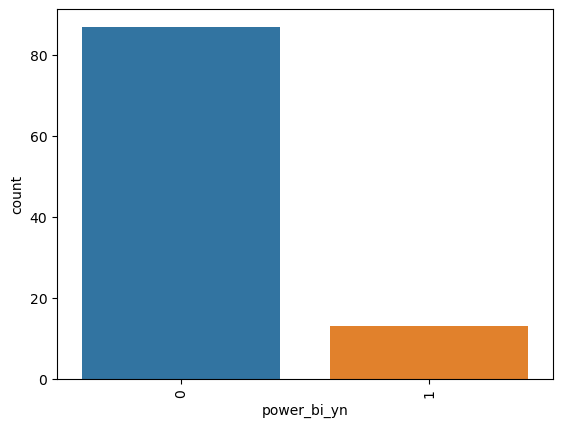

Graph for powerpoint_yn: total = 2


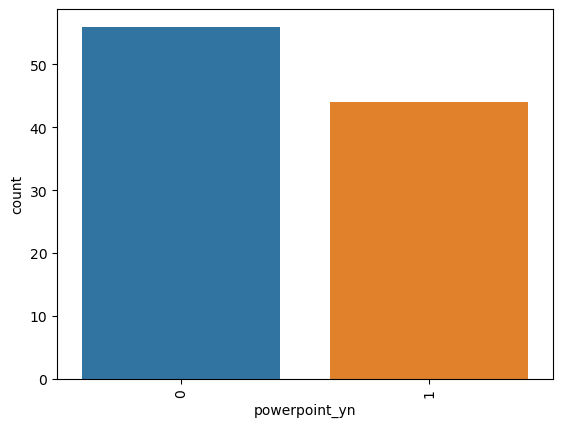

Graph for meta_yn: total = 2


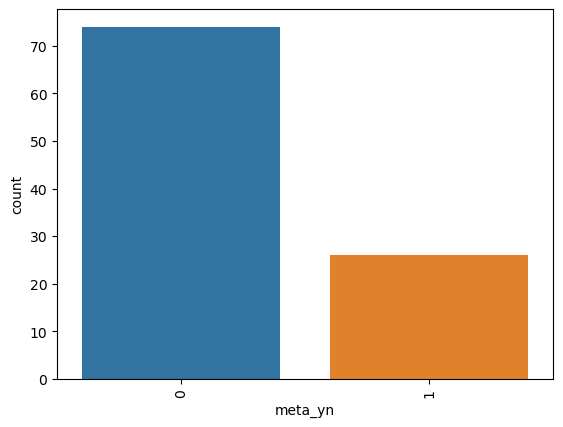

Graph for tableau_yn: total = 2


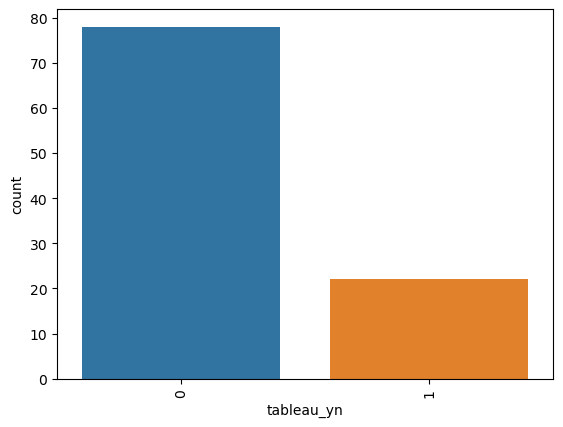

Graph for sql_yn: total = 2


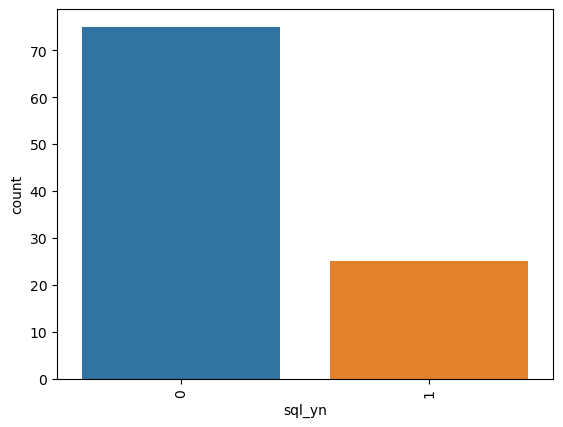

Graph for job_simplified: total = 7


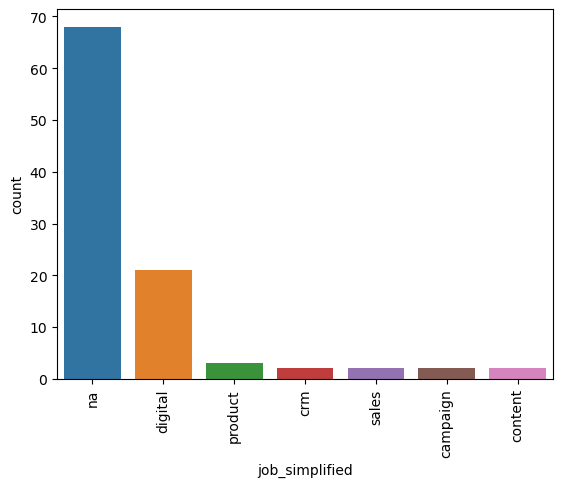

Graph for seniority: total = 3


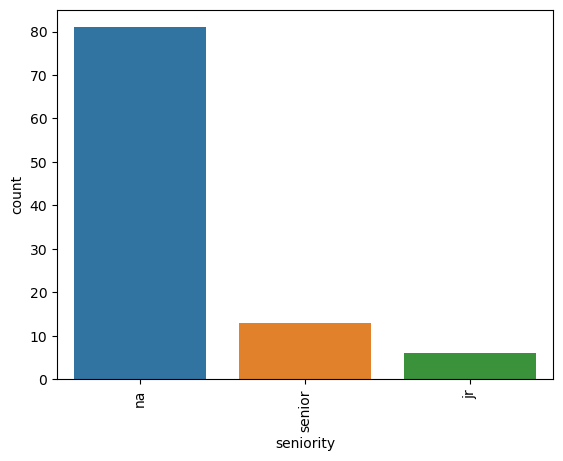

In [34]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [35]:
# we can see the locations, sectors, industries, 
# and type where positions are more popular.
# we can also see what skills are more popular.

Graph for Company: total = 20


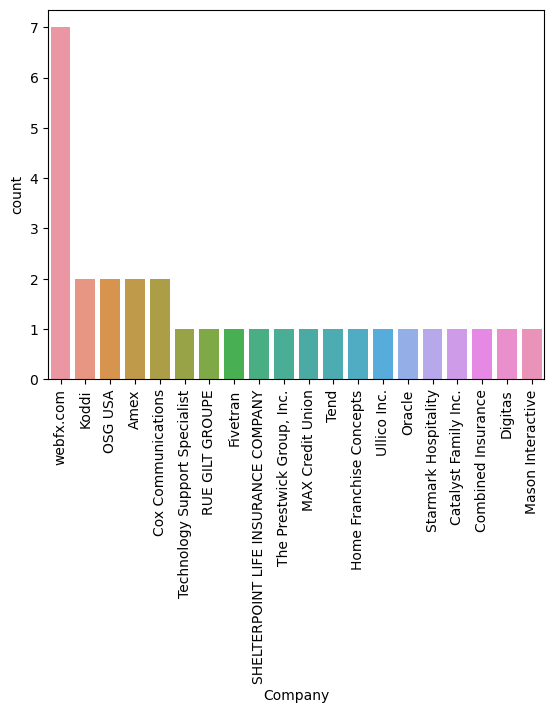

Graph for job_state: total = 20


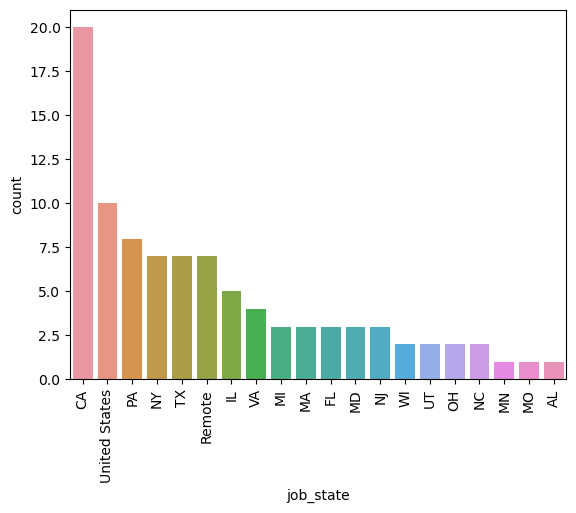

Graph for job_city: total = 20


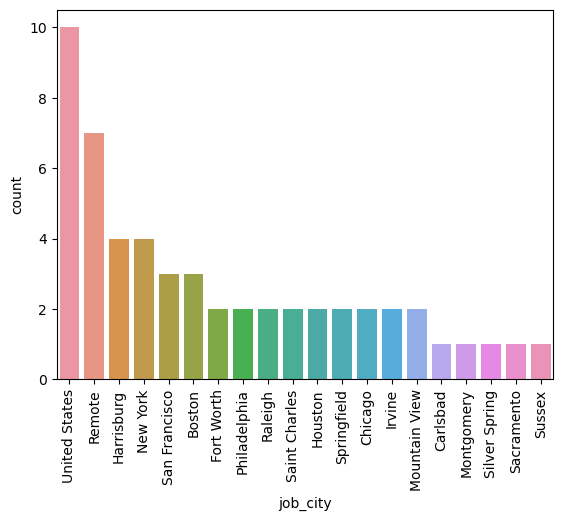

Graph for Sector: total = 19


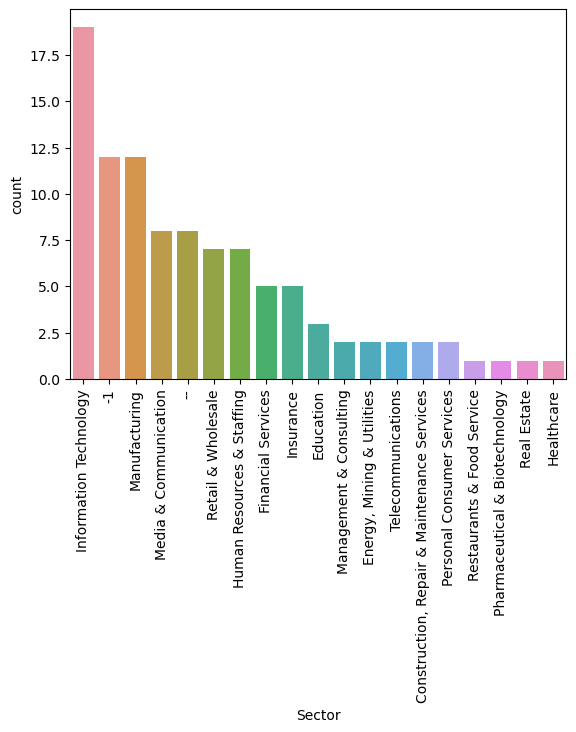

Graph for Industry: total = 20


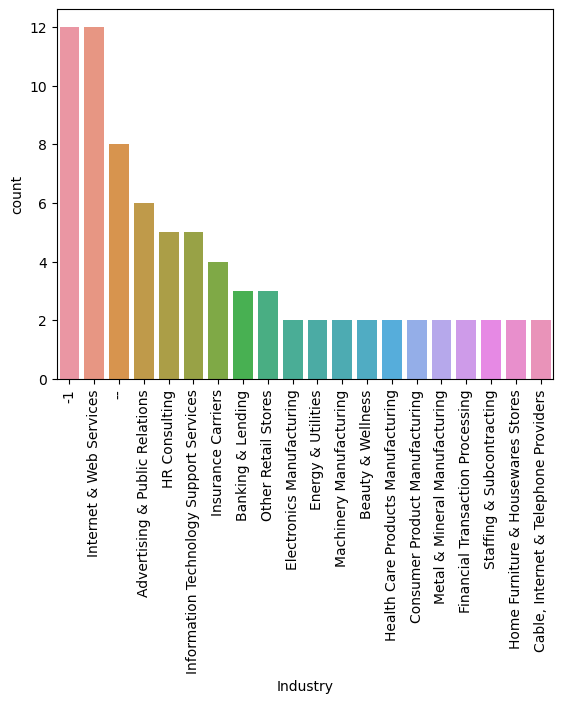

In [36]:
for i in df_cat[['Company','job_state', 'job_city','Sector', 'Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [37]:
df.columns

Index(['Job Title', 'Company', 'Job Description', 'Salary Estimate', 'Rating',
       'Location', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'salary_min', 'salary_max', 'salary_avg',
       'Employer Provided', 'job_state', 'job_city', 'company_age',
       'planning_yn', 'customer_segmentation_yn', 'A/B_yn', 'kpi_metrics_yn',
       'customer_behavior_yn', 'forecasting_yn', 'python_yn', 'ga4_yn',
       'html_yn', 'sprout_yn', 'sf_yn', 'excel_yn', 'adobe_yn', 'g_ads_yn',
       'power_bi_yn', 'powerpoint_yn', 'meta_yn', 'tableau_yn', 'sql_yn',
       'job_simplified', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [38]:
pd.pivot_table(df, index='job_simplified', values= 'salary_avg')

,salary_avg
job_simplified,
campaign,80000.000000
content,103542.400000
crm,81000.000000
digital,49856.904762
na,72572.264706
product,44499.666667
sales,74960.000000


In [39]:
pd.pivot_table(df, index=['job_simplified', 'seniority'], values= 'salary_avg')

salary_avg
job_simplified seniority               
campaign       na          80000.000000
content        na         103542.400000
crm            na          69500.000000
               senior      92500.000000
digital        jr          46500.000000
               na          49156.000000
               senior      55833.000000
na             jr          43624.750000
               na          71210.982143
               senior      96575.000000
product        na          44499.666667
sales          na          49920.000000
               senior     100000.000000

In [40]:
pd.pivot_table(df, index=['job_state', 'job_simplified'], values= 'salary_avg', aggfunc='count').sort_values('job_state', ascending=False)

salary_avg
job_state     job_simplified            
WI            sales                    1
              na                       1
WA            na                       1
VA            na                       1
              digital                  2
              campaign                 1
United States digital                  4
              product                  1
              na                       5
UT            digital                  2
TX            sales                    1
              na                       4
              digital                  2
Remote        na                       5
              digital                  2
PA            product                  1
              na                       3
              digital                  4
OH            na                       1
              digital                  1
NY            na                       6
              campaign                 1
NV            na                       1
NJ            na                       3
NC            na                       1
              digital                  1
MO            na                       1
MN            na                       1
MI            na                       3
MD            na                       2
              crm                      1
MA            na                       3
KY            crm                      1
IL            na                       4
              digital                  1
ID            na                       1
GA            product                  1
FL            na                       2
              digital                  1
CA            content                  2
              na                      17
              digital                  1
AR            na                       1
AL            na                       1

In [41]:
pd.pivot_table(df[df.job_simplified=='digital'], index=['job_state', 'job_simplified'], values='salary_avg').sort_values('salary_avg', ascending=False)

,,salary_avg
job_state,job_simplified,
IL,digital,95500.0
NC,digital,79000.0
PA,digital,68625.0
CA,digital,68500.0
TX,digital,67750.0
UT,digital,60000.0
FL,digital,58500.0
VA,digital,57750.0
OH,digital,55000.0


In [42]:
#'Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'Employer Provided', 'planning_yn', 'customer_segmentation_yn', 'A/B_yn', 'kpi_metrics_yn',
#'customer_behavior_yn', 'forecasting_yn', 'python_yn', 'ga4_yn',
# 'html_yn', 'sprout_yn', 'sf_yn', 'excel_yn', 'adobe_yn', 'g_ads_yn',
# 'power_bi_yn', 'powerpoint_yn', 'meta_yn', 'tableau_yn', 'sql_yn',
# 'Type of ownership'

In [43]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'Employer Provided', 'planning_yn', 'customer_segmentation_yn', 'A/B_yn', 'kpi_metrics_yn',
'customer_behavior_yn', 'forecasting_yn', 'python_yn', 'ga4_yn', 'html_yn', 'sprout_yn', 'sf_yn', 'excel_yn', 'adobe_yn', 'g_ads_yn',
'power_bi_yn', 'powerpoint_yn', 'meta_yn', 'tableau_yn', 'sql_yn', 'Type of ownership', 'salary_avg']]

In [44]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='salary_avg').sort_values('salary_avg', ascending=False))

Rating
           salary_avg
Rating               
 3.5    139500.000000
 4.6    120000.000000
 4.3     98640.000000
 3.6     86750.000000
 3.7     85036.666667
 3.1     85000.000000
 3.3     81250.000000
 3.2     79000.000000
 2.9     76750.000000
 4.1     76111.800000
-1.0     76109.726316
 3.4     73000.000000
 3.9     70600.000000
 2.4     69750.000000
 4.5     65579.800000
 2.8     60000.000000
 4.0     57499.800000
 3.8     53562.250000
 3.0     51655.600000
 4.2     50333.133333
 4.4     49166.333333
 5.0     34749.500000
Industry
                                            salary_avg
Industry                                              
Staffing & Subcontracting                122800.000000
Insurance Agencies & Brokerages          107000.000000
Preschools & Child Care Services         101000.000000
Home Furniture & Housewares Stores        90250.000000
Health Care Services & Hospitals          90000.000000
Business Consulting                       89400.000000
Broadcast Media 

ValueError: Grouper for 'salary_avg' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index='Revenue', columns='sql_yn', values='salary_avg', aggfunc='count')

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [251]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17jul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [253]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17jul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

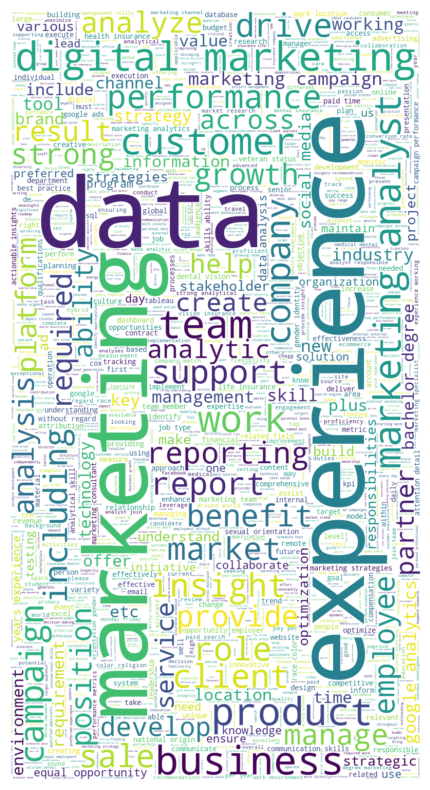

In [255]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [45]:
df.to_csv('eda_data.csv')